In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
import time 
from importlib import reload
import copy
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))
from IPython.display import clear_output

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle, Rectangle

import scoobi
from scoobi.math_module import xp, _scipy, ensure_np_array
from scoobi.imshows import imshow1, imshow2, imshow3
import scoobi.scoobi as scoobi
import scoobi.utils as utils

import lina

print(scoobi.__file__)
print(lina.__file__)

import purepyindi
from purepyindi import INDIClient
import purepyindi2
from purepyindi2 import IndiClient

client0 = INDIClient('localhost', 7624)
client0.start()

client = IndiClient()
client.connect()
client.get_properties()

def restart_clients():
    client0 = INDIClient('localhost', 7624)
    client0.start()

    client = IndiClient()
    client.connect()
    client.get_properties()

/opt/conda/envs/km310env/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


/home/kianmilani/Projects/scoob-interface/scoobi/scoobi.py
/home/kianmilani/Projects/lina/lina/__init__.py


In [2]:
scoobi.home_block(client0)

In [4]:
scoobi.move_block_out(client0)

In [2]:
reload(scoobi)
I = scoobi.SCOOBI(scicam_channel='camsci', dm_channel='dm00disp02')
bias = 800e-9 * np.ones((I.Nact,I.Nact))*I.dm_mask

In [86]:
reload(scoobi)
xc, yc = (4600, 3400)
npsf = 256
scoobi.set_zwo_roi(xc, yc, npsf, client0)


In [98]:
reload(scoobi)
xc, yc = (4600, 3400)
npsf = 256
scoobi.set_zwo_roi(xc, yc, npsf, client0)

In [99]:
I.set_zwo_exp_time(0.0005, client0)

Set the ZWO exposure time to 5.00e-04s


In [100]:
I.set_zwo_gain(120, client0)

Set the ZWO gain setting to 120.0


In [97]:
I.set_fib_atten(10, client)

Set the fiber attenuation to 10.0


In [96]:
scoobi.move_psf(-2, 0, client0)

In [94]:
scoobi.move_psf(0, -2, client0)

In [21]:
I.zero_dm()

In [8]:
I.set_dm(bias)

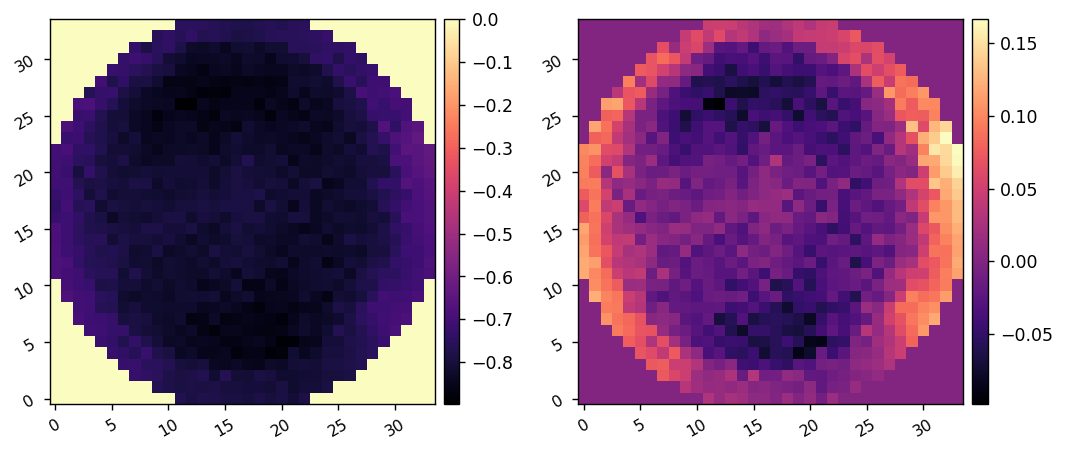

In [84]:
total_dm = I.DMT.grab_latest() 
imshow2(total_dm, total_dm + 0.8*I.dm_mask)

In [85]:
utils.save_fits('total_dm.fits', total_dm)

Saved data to:  total_dm.fits


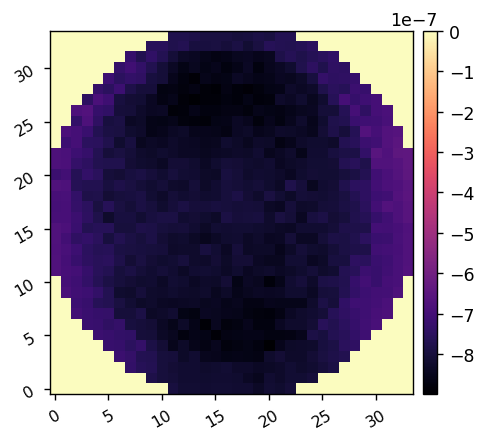

In [20]:
old_flat = fits.getdata('total_dm.fits') * 1e-6
imshow1(old_flat)

In [21]:
I.set_dm(old_flat)

In [19]:
I.zero_dm()

# Test registration

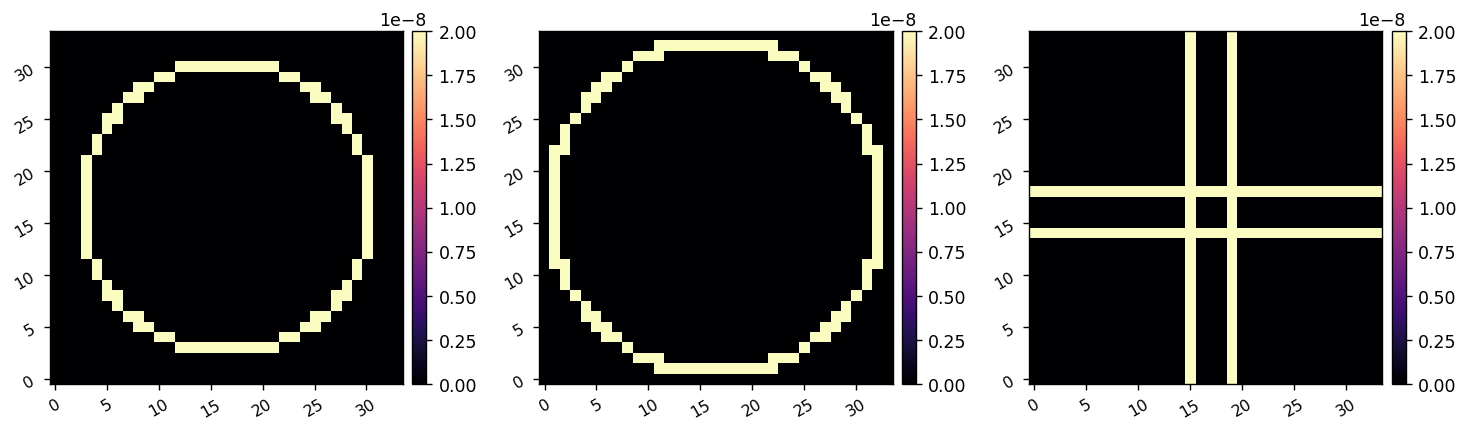

In [49]:
reload(lina.utils)

zeros = np.zeros((34,34))
ring_13 = 20e-9 * lina.utils.make_ring(rad=13, Nact=34)
ring_14 = 20e-9 * lina.utils.make_ring(rad=14, Nact=34)
ring_15 = 20e-9 * lina.utils.make_ring(rad=15, Nact=34)
ring_16 = 20e-9 * lina.utils.make_ring(rad=16, Nact=34)
cross = 20e-9 * lina.utils.make_cross_command(xc=[-1, 3], yc=[2,-2])
imshow3(ring_14, ring_16, cross)

In [77]:
from magpyx.utils import ImageStream
fdpr2_amp_stream = ImageStream('fdpr2_amp')
fdpr2_phs_stream = ImageStream('fdpr2_phase')

In [91]:
command = zeros
command = ring_14
command = cross

INFO:utils:Got semaphore index 1.
INFO:fdpr2:Estimated phase RMS: 0.106 (rad)
INFO:fdpr2:Estimated amplitude RMS: 6.29 (%)
INFO:fdpr2:Estimated Strehl: 0.98 (0.99 phase-only and 1.00 amplitude-only)
INFO:fdpr2:Updated shmims fdpr2_phase and fdpr2_amp


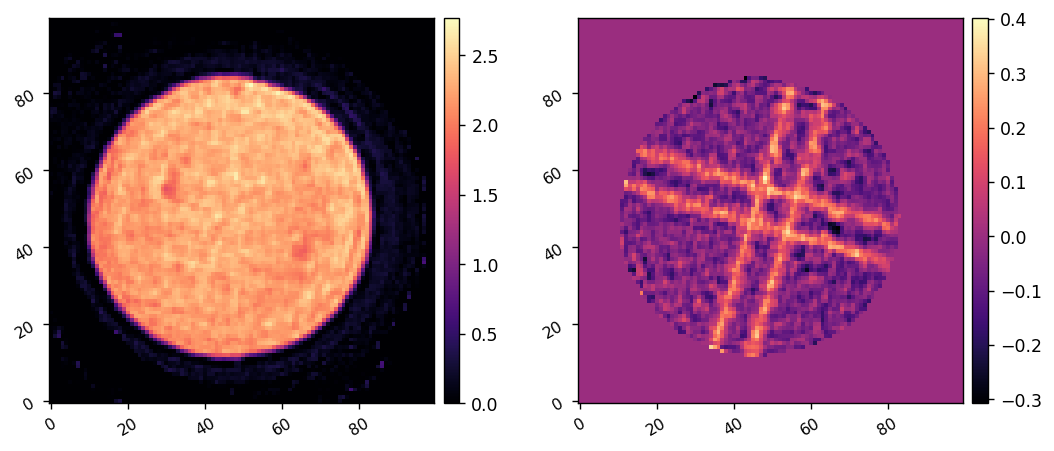

In [92]:
from magpyx.fdpr2 import console, tools

config_params = tools.Configuration('fdpr2_fpm')

I.set_dm(command)
fitdict, Imeas_cen = console.estimate_oneshot(config_params)
fitdict.update({'dm_command':command})

I.zero_dm()
fitdict.update({
    'amp':fdpr2_amp_stream.grab_latest(),
    'phs':fdpr2_phs_stream.grab_latest(),
})

imshow2(fitdict['amp'], fitdict['phs'], npix=100)


In [93]:
# utils.save_pickle('fitdict_zeros.pkl', fitdict)
# utils.save_pickle('fitdict_ring_14.pkl', fitdict)
utils.save_pickle('fitdict_cross.pkl', fitdict)

Saved data to:  fitdict_cross.pkl


In [84]:
fitdict.keys()

dict_keys(['phase_est', 'amp_est', 'obj_val', 'fit_params', 'fitdict', 'dm_command', 'amp', 'phs'])

In [81]:
imshow2(fitdict['amp']*fitdict['mask'], fitdict['phs'], npix=100)

KeyError: 'mask'

In [10]:
reload(scoobi)
I.set_zwo_exp_time(0.000120, client0)

Set the ZWO exposure time to 1.20e-04s


In [11]:
reload(scoobi)
I.set_zwo_gain(120, client0)

Set the ZWO gain setting to 120.0


In [19]:
reload(scoobi)
I.set_fib_atten(5, client)

Set the fiber attenuation to 5.0
